## Perzeptron

In this notebook, we design, implement, train and try out a perceptron as a binary classifier for the given iris dataset.

The dataset is in this case a simplified version of the original dataset from the UCI.
While the original dataset has three target classes, this simplified version has only two.
The number of instances is the same. See https://archive.ics.uci.edu/ml/datasets/iris for the original.

* The four features `xi` are `x1` named `sepal_length`, `x2` named `sepal_width`, `x3` named `petal length`, `x4` named `petal width`.
* Together the features form the vector `x`.
* Note that the unit of measurement of width and length is in this case unknown, however also not relevant to the task at hand.

The dataset has one binary target.

* The target is `y` with its column name `class` is categorical and binary.
* Note that where we actually use the categorical data type of the library pandas for it, we call the column `class_cat`.

Our perceptron is going to have one weight per feature and the additive weiht b for the bias.

* We call the weights `wi` simply ```w1, w2, w3, w4```, each of which corresponds to the feature `xi` that has the same index `i`.
* Together these four weights form the vector `w`.
* The additive weight `b` represents the bias and is in this case stored outside of `w`.

Our perceptron yields binary output.

* The prediction obtained at the output of the perceptron we call `y_hat`.
* The difference between a known result `y` and a predicted result `y_hat` we call `y_diff`.
* Note that `y` and `y_hat` can also be vectors in case multiple results and corresponding predictions are referred to.

Our perceptron has a learning rate built in.

* The lerning rate alpha we call `lr`.

Our perceptron has two functions to update weights.

* The function `fwu` is used to compute the new weight values.
* The function `fbu` is used to compute the new value for `b`.

The model function of our perceptron is a step functuion also known as a Heaviside function.

* The function `fm` is the model function of the perceptron.

#### Imports & Settings

In [207]:
# in this code block we gather all imports

import numpy as np

# MinMaxScaler for data normalization
from sklearn.preprocessing import MinMaxScaler

# for some plots and the scatter matrix
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm

# pandas for reading the CSV and for use with the library ppscore
import pandas as pd
from pandas.api.types import CategoricalDtype

# ppscore for exploratory data analysis
import ppscore as pps

# more statistics for exploratory data analysis
from scipy import stats

#### Load Data

In [208]:
# in this code block we read the CSV file and perform some basic preprocessing

# read the CSV file
# using separator character semicolon
df_all_pd = pd.read_csv("../../data/iris_binary.csv", sep=',', skipinitialspace=True)

# make column names pythonic
# so that they can be used in code where applicable
df_all_pd.columns = df_pd.columns.str.replace(" ", "_")

# on a side note we choose to sort the data frame by the first column 
df_all_pd.sort_values(by='sepal_length', ascending=True, axis=0, inplace=True)

dataset_known = df_all_pd.to_numpy()

x_known_pd = df_all_pd.copy().drop('class', axis=1)
x_known = x_known_pd.to_numpy()

y_known_pd = df_all_pd['class'].copy()
y_known = y_known_pd.to_numpy()


In [209]:
df_all_pd

,sepal_length,sepal_width,petal_length,petal_width,class
22,4.3,3.0,1.1,0.1,0
128,4.4,2.9,1.4,0.2,0
141,4.4,3.0,1.3,0.2,0
3,4.4,3.2,1.3,0.2,0
47,4.5,2.3,1.3,0.3,0
...,...,...,...,...,...
119,7.7,3.0,6.1,2.3,1
13,7.7,3.8,6.7,2.2,1
44,7.7,2.6,6.9,2.3,1
56,7.7,2.8,6.7,2.0,1


#### Exploratory Data Analysis

n=150
mean=[5.84333333 3.054      3.75866667 1.19866667 0.66666667]
trimmed_mean=[5.8083334 3.0391667 3.7608333 1.1841667 0.7083333]
mode=ModeResult(mode=array([[5. , 3. , 1.5, 0.2, 1. ]]), count=array([[ 10,  26,  14,  28, 100]]))
range=[3.6 2.4 5.9 2.4 1. ]
iqr=[1.3 0.5 3.5 1.5 1. ]
percentile_10=[4.8 2.5 1.4 0.2 0. ]
percentile_25=[5.1 2.8 1.6 0.3 0. ]
median=[5.8  3.   4.35 1.3  1.  ]
percentile_75=[6.4 3.3 5.1 1.8 1. ]
percentile_90=[6.9  3.61 5.8  2.2  1.  ]
mad=[0.68755556 0.33309333 1.56192    0.65893333 0.44444444]
std=[0.82530129 0.43214658 1.75852918 0.76061262 0.47140452]
var=[0.68112222 0.18675067 3.09242489 0.57853156 0.22222222]

correlation_matrix=
[[ 1.   -0.11  0.87  0.82  0.72]
 [-0.11  1.   -0.42 -0.36 -0.6 ]
 [ 0.87 -0.42  1.    0.96  0.92]
 [ 0.82 -0.36  0.96  1.    0.89]
 [ 0.72 -0.6   0.92  0.89  1.  ]]


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,petal_length,class_cat,1.000000,classification,True,weighted F1,0.546667,1.000000,DecisionTreeClassifier()
1,petal_width,class_cat,1.000000,classification,True,weighted F1,0.546667,1.000000,DecisionTreeClassifier()
2,class,class_cat,1.000000,classification,True,weighted F1,0.546667,1.000000,DecisionTreeClassifier()
3,sepal_length,class_cat,0.777631,classification,True,weighted F1,0.546667,0.899193,DecisionTreeClassifier()
4,sepal_width,class_cat,0.514539,classification,True,weighted F1,0.546667,0.779924,DecisionTreeClassifier()


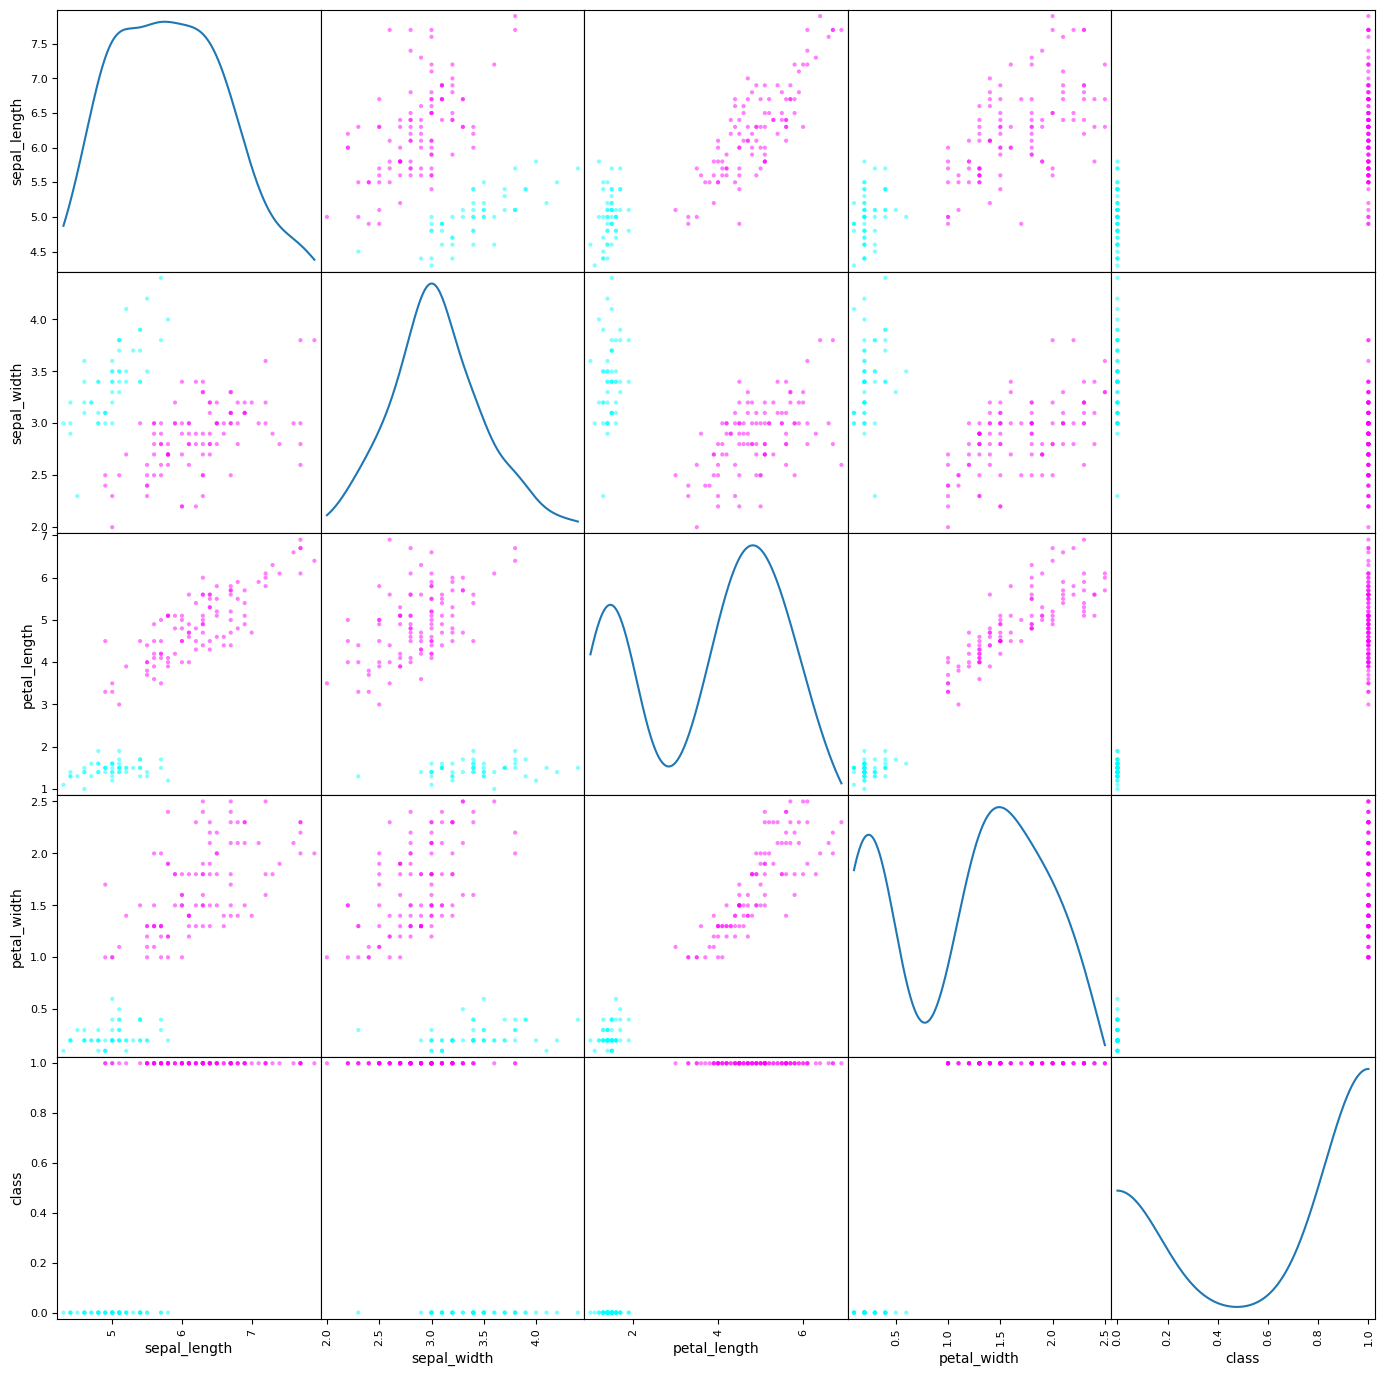

In [210]:
# in this code block we do an EDA

# number of instances
print(f"n={dataset_known.shape[0]}")

# location parameters
print(f"mean={dataset_known.mean(axis=0)}")
print(f"trimmed_mean={stats.trim_mean(dataset_known.astype('float32'), proportiontocut=0.10, axis=0)}")
print(f"mode={stats.mode(dataset_known, keepdims=True)}")

# statistical dispersion measures
def range_np(a: np.ndarray) -> np.ndarray:
    result = a.max(axis=0) - a.min(axis=0)
    return result

print(f"range={range_np(dataset_known)}")
print(f"iqr={stats.iqr(dataset_known, axis=0)}")

print(f"percentile_10={np.percentile(dataset_known, 10.0, axis=0)}")
print(f"percentile_25={np.percentile(dataset_known, 25.0, axis=0)}")
print(f"median={np.percentile(dataset_known, 50.0, axis=0)}")
print(f"percentile_75={np.percentile(dataset_known, 75.0, axis=0)}")
print(f"percentile_90={np.percentile(dataset_known, 90.0, axis=0)}")

def mad_np(a: np.ndarray) -> np.ndarray:
    result = np.mean(np.absolute(a - np.mean(a, axis=0)), axis=0)
    return result

print(f"mad={mad_np(dataset_known)}")

print(f"std={dataset_known.std(axis=0)}")
print(f"var={dataset_known.var(axis=0)}")

# association measures
print(f"\ncorrelation_matrix=\n{np.corrcoef(dataset_known, rowvar=False).round(decimals=2)}")

# we have a look at a scatter matrix
pd.plotting.scatter_matrix(df_all_pd, 
                           c=df_all_pd['class'], 
                           figsize=(17, 17),
                           cmap = cm['cool'],
                           diagonal = 'kde')

# for the computation of predictive power scores we use pandas categorical data type for class_cat
class_categories_pd = CategoricalDtype(categories=[0, 1], ordered=True)
df_all_with_class_cat_pd = df_all_pd.copy()
df_all_with_class_cat_pd['class_cat'] = df_all_pd['class'].astype(class_categories_pd)
df_all_with_class_cat_pd.drop('class', axis=1)

#predictive_power_score_matrix_all_pd = pps.matrix(df_pd_all, output='df')
predictive_power_scores_pd = pps.predictors(df_all_with_class_cat_pd, y='class_cat', output='df')
predictive_power_scores_pd.style.background_gradient(cmap='twilight', low=0.0, high=1.0)
